+ **목표** : 카카오싱크 회원과 정회원에 대한 현황 비교


+ **비교내용**
    + [ ] ~~1.Aqusition : 해당사항 없음~~
    + [ ] 2.Activation
      + [x] a.가입추이
      + [ ] b.가입체널(관계사)
      + [ ] c.로그인 횟수
    + [ ] 3.Retention
      + [ ] a.재방문 비중
      + [ ] b.재방문 주기
    + [ ] ~~4.Referral : 해당사항 없음~~
    + [ ] 5.Revenue
      + [ ] a.DS 구매자 비율
      + [ ] b.DS 구매자 금액
    <!-- + [ ] 적정 분류 수 탐색 -->
    
    
+ **고려사항**
    + [ ] Activity 내용은 큰 문제 없음
    + [ ] 구매 등 Retention 내용은 정회원으로 귀속되는 바, 별도 자료관리가 필요함


### 0.import

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.core.display import Image
%matplotlib inline

import os
# os.environ["NLS_LANG"] = ".KO16MSWIN949"  #encodring이 CP949(euc-kr)인 경우
os.environ["NLS_LANG"] = ".AL32UTF8"      #encodring이 UTF-8 인 경우
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

In [2]:
###############
# DB접속
#####

import cx_Oracle as oci
import pandas as pd

# 접속정보
con_text = open("C:/conn_info.txt", 'r', encoding='utf8')
con_text = con_text.read()

# DB 접속
conn = oci.connect(con_text)

### 1.Aqusition : 해당없음

### 2.Activation

#### a.가입추이

In [4]:
#######
#  자료 불러오기
###

# 카카오싱크 회원
f = open("./query_SYNC_activate.txt", 'r'); line = f.read(); f.close()
df1 = pd.read_sql(line, con = conn)

# 정회원
f = open("./query_Norm_activate.txt", 'r'); line = f.read(); f.close()
df2 = pd.read_sql(line, con = conn)

In [5]:
# data type 변경

df1['YYYYMM'] = df1['REG_DTM'].dt.strftime('%Y-%m')
df2['YYYYMM'] = df2['REG_DTM'].dt.strftime('%Y-%m')

df1['GUBUN'] = 'Kakao'
df2['GUBUN'] = '정회원'

# df1['REG_DTM'] = df1['REG_DTM'].astype('datetime64[ns]')
# df1['YYYYMM'] = df1['REG_DTM'].str[:5]
# df1['YYYYMM'] = df1['REG_DTM'].dt.strftime('%Y-%m')

In [49]:
# data1 = pd.concat([df1, df2], axis =0, ignore_index = True ) 

In [25]:
df1.head()

,UNFY_MMB_NO,AGE,GENDER,NTRY_PATH_GUBUN,REG_DTM,LOGIN_CNT,LOGIN_AVG,LOGIN_LAST,YYYYMM,GUBUN
0,5390000,33,M,MAEILI,2019-08-19 11:24:09,4,79.1,93,2019-08,Kakao
1,5600000,55,F,MAEILI,2020-03-26 11:41:43,2,0.0,195,2020-03,Kakao
2,5640000,38,F,매일다이렉트_카카오싱크,2020-05-06 11:13:11,5,9.6,106,2020-05,Kakao
3,5650000,35,F,매일다이렉트_카카오싱크,2020-05-06 13:07:23,3,16.0,106,2020-05,Kakao
4,5660000,43,F,매일다이렉트_카카오싱크,2020-05-06 15:49:32,2,24.0,106,2020-05,Kakao


In [32]:
# df1_act2 = pd.crosstab(df1.NTRY_PATH_GUBUN, df1.GUBUN, df1.UNFY_MMB_NO, aggfunc="count")
# df1_act2 = pd.crosstab(df2.NTRY_PATH_GUBUN, df2.GUBUN, df2.UNFY_MMB_NO, aggfunc="count")

# df1_act3 = pd.crosstab(data1.NTRY_PATH_GUBUN, data1.GUBUN, data1.LOGIN_AVG, aggfunc="count")

In [ ]:
# df2.groupby(by = ['NTRY_PATH_GUBUN'], as_index=False)['UNFY_MMB_NO'].count()

In [25]:
# 자료 1차 가공

data1_N = df2.groupby(by = ['YYYYMM'], as_index=False)['UNFY_MMB_NO'].count()
data1_N['GUBUN'] = '정회원'
data1_N.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)
data1_N = data1_N[:-1]

data1_K = df1.groupby(by = ['YYYYMM'], as_index=False)['UNFY_MMB_NO'].count()
data1_K['GUBUN'] = 'Kakao'
data1_K.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)
data1_K = data1_K[:-1]

# 자료 merge
data1 = pd.concat([data1_K, data1_N], axis =0,ignore_index = True ) 


In [51]:
# df2_act1

In [48]:
# df1_act1.head(1)

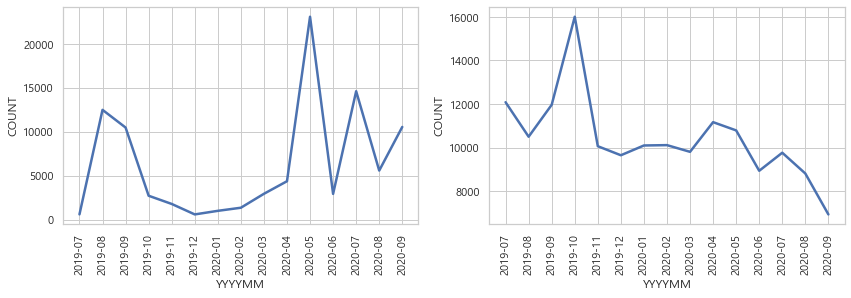

In [38]:
df1_act1 = df1.groupby(by = ['YYYYMM'], as_index=False)['UNFY_MMB_NO'].count()[:-1]
df1_act1.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)
df1_act1['COUNT'].loc[df1_act1['COUNT'] > df1_act1['COUNT'].quantile(0.99)] = df1_act1['COUNT'].mean()

df2_act1 = df2.groupby(by = ['YYYYMM'], as_index=False)['UNFY_MMB_NO'].count()[:-1]
df2_act1.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)

# plot 표기
mpl.rc('figure', figsize=(14, 4))

ax = plt.subplot(1,2,1)
sns.lineplot(x= 'YYYYMM', y = 'COUNT', data = df1_act1, lw=2.5)
plt.xticks(rotation=90)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

ax = plt.subplot(1,2,2)
sns.lineplot(x= 'YYYYMM', y = 'COUNT', data = df2_act1, lw=2.5)
plt.xticks(rotation=90)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.show()

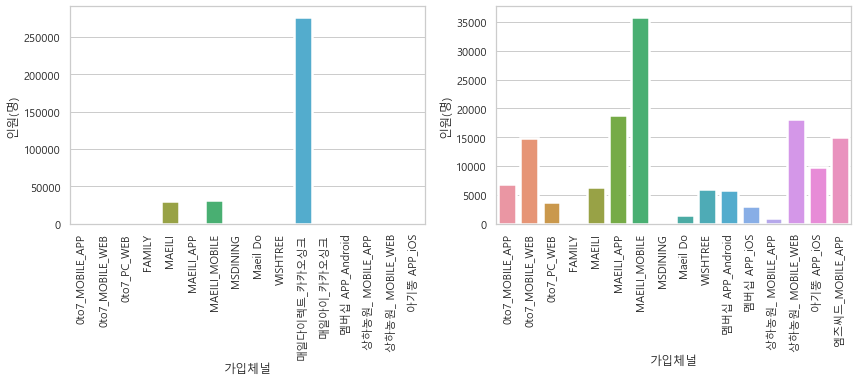

In [74]:
df1_act2 = df1.groupby(by = ['NTRY_PATH_GUBUN'], as_index=False)['UNFY_MMB_NO'].count()
df1_act2.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)

df2_act2 = df2.groupby(by = ['NTRY_PATH_GUBUN'], as_index=False)['UNFY_MMB_NO'].count()
df2_act2.rename(columns = {'UNFY_MMB_NO' : 'COUNT'}, inplace = True)

# plot 표기
mpl.rc('figure', figsize=(14, 4))

ax = plt.subplot(1,2,1)
sns.barplot(x= 'NTRY_PATH_GUBUN', y = 'COUNT', data = df1_act2, lw=2.5)
plt.xticks(rotation=90)
plt.xlabel('가입체널')
plt.ylabel('인원(명)')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

ax = plt.subplot(1,2,2)
sns.barplot(x= 'NTRY_PATH_GUBUN', y = 'COUNT', data = df2_act2, lw=2.5)
plt.xticks(rotation=90)
plt.xlabel('가입체널')
plt.ylabel('인원(명)')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.show()

In [76]:
# pd.crosstab(data1.YYYYMM,data1.GUBUN,  data1.COUNT, aggfunc="sum")

In [ ]:
# 가입체널(관계사)

In [83]:
df1.columns

Index(['UNFY_MMB_NO', 'AGE', 'GENDER', 'NTRY_PATH_GUBUN', 'REG_DTM',
       'LOGIN_CNT', 'LOGIN_AVG', 'LOGIN_LAST', 'YYYYMM', 'GUBUN'],
      dtype='object')

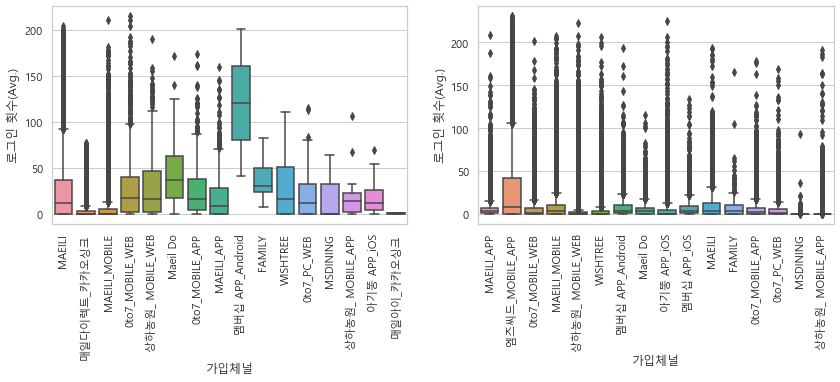

In [86]:
# plot 표기
mpl.rc('figure', figsize=(14, 4))

ax = plt.subplot(1,2,1)
sns.boxplot(x="NTRY_PATH_GUBUN", y="LOGIN_AVG", data=df1)
plt.xticks(rotation=90)
plt.xlabel('가입체널')
plt.ylabel('로그인 횟수(Avg.)')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

ax = plt.subplot(1,2,2)
sns.boxplot(x="NTRY_PATH_GUBUN", y="LOGIN_AVG", data=df2)
plt.xticks(rotation=90)
plt.xlabel('가입체널')
plt.ylabel('로그인 횟수(Avg.)')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.show()

In [ ]:
data1_K = df1.groupby(by = ['YYYYMM'], as_index=False)['UNFY_MMB_NO'].count()

mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(data1_K.YYYYMM, data1_K.GUBUN, data1_K.금액, aggfunc="count").plot.bar(ax = ax)
# sns.lineplot(x= 'date', y = '금액', hue ='GUBUN', data = data0_M, lw=2.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=90)
plt.title('월 충전금액 Trend',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('충전금액(억원)')

In [4]:
#######
# 이용행태 2 : retension
###

# query 열기/실행
f = open("./query_SYNC_retension.txt", 'r'); line = f.read(); f.close()
df_re1 = pd.read_sql(line, con = conn)

# f = open("./query_SYNC_retension2.txt", 'r'); line = f.read(); f.close()
# df_re2 = pd.read_sql(line, con = conn)

In [5]:
# 접속정보
con_text = open("C:/conn_CRM.txt", 'r', encoding='utf8')
con_text = con_text.read()

# DB 접속
conn = oci.connect(con_text)

f = open("./query_SYNC_retension3.txt", 'r'); line = f.read(); f.close()
df_re3 = pd.read_sql(line, con = conn)

In [6]:
df_re1.tail()

,UNFY_MMB_NO,CHANNEL_ALL_CNT,CHANNEL_ONLINE_SUM,CHANNEL_OFFLINE_SUM
59573,6018066,1,0,0
59574,6018239,1,0,0
59575,6018538,1,0,0
59576,6018576,1,0,0
59577,6018939,1,0,0


In [7]:
# df2.head()

In [8]:
df_all = pd.merge(df0, df1, on ='UNFY_MMB_NO', how ='left')
df_all = pd.merge(df_all, df2, on ='UNFY_MMB_NO', how ='left')
df_all = pd.merge(df_all, df3, on ='UNFY_MMB_NO', how ='left')
df_all = pd.merge(df_all, df_re1, on ='UNFY_MMB_NO', how ='left')
df_all = pd.merge(df_all, df_re2, on ='UNFY_MMB_NO', how ='left')
df_all = pd.merge(df_all, df_re3, on ='UNFY_MMB_NO', how ='left')

In [9]:
df_all.rename(columns = {"'멸균'"    : "EMP_멸균", 
                         "'영유아식'": "EMP_영유아식",
                         "'냉장'"    : "EMP_냉장", 
                         "'초콜릿'"  : "EMP_초콜릿", 
                         "'일반식품'": "EMP_일반식품", 
                         "'커피'"    : "EMP_커피", 
                         "'동물식'"  : "EMP_동물식", 
                         "'판촉물'"  : "EMP_판촉물", 
                         "'성인영양'": "EMP_성인영양", 
                         "'기타'"    : "EMP_기타"}, inplace = True)

In [10]:
df_all.rename(columns = {"'direct_멸균'"    : "direct_멸균", 
                         "'direct_영유아식'": "direct_영유아식",
                         "'direct_냉장'"    : "direct_냉장", 
                         "'direct_초콜릿'"  : "direct_초콜릿", 
                         "'direct_일반식품'": "direct_일반식품", 
                         "'direct_커피'"    : "direct_커피", 
                         "'direct_동물식'"  : "direct_동물식", 
                         "'direct_판촉물'"  : "direct_판촉물", 
                         "'direct_성인영양'": "direct_성인영양", 
                         "'direct_HRM'"     : "direct_HRM", 
                         "'direct_디저트'"  : "direct_디저트", 
                         "'direct_기타'"    : "direct_기타"}, inplace = True)

In [11]:
df_all.tail()

,UNFY_MMB_NO,AGE,GENDER,NTRY_PATH_GUBUN,REG_DTM,LOGIN_CNT,LOGIN_AVG,LOGIN_LAST,LOGIN_RANGE,LOGIN_CHANNEL,...,direct_냉장,direct_초콜릿,direct_일반식품,direct_커피,direct_동물식,direct_판촉물,direct_성인영양,direct_HRM,direct_디저트,direct_기타
354730,6016213,37.0,M,매일다이렉트_카카오싱크,2020-08-28 08:08:14,2.0,0.0,5.0,1.0,7010,...,NaN,None,None,None,None,None,1.0,NaN,None,NaN
354731,6016369,48.0,F,매일다이렉트_카카오싱크,2020-08-28 12:45:35,3.0,0.3,4.0,1.0,7010,...,NaN,None,None,None,None,None,1.0,NaN,None,NaN
354732,6016402,30.0,F,MAEILI_MOBILE,2020-08-28 13:30:45,1.0,0.0,5.0,1.0,7010,...,NaN,None,None,None,None,None,NaN,NaN,None,NaN
354733,6016408,34.0,F,매일다이렉트_카카오싱크,2020-08-28 13:37:59,1.0,0.0,5.0,1.0,7010,...,NaN,None,None,None,None,None,NaN,NaN,None,NaN
354734,6016440,32.0,F,MAEILI_MOBILE,2020-08-28 14:24:39,5.0,0.0,5.0,2.0,7010,...,NaN,None,None,None,None,None,NaN,NaN,None,NaN


In [12]:
# df_all.info()

In [13]:
df_all.select_dtypes(include=['float64']).columns

Index(['AGE', 'LOGIN_CNT', 'LOGIN_AVG', 'LOGIN_LAST', 'LOGIN_RANGE',
       'LOGIN_CHANNEL_CNT', 'CHANNEL_ALL_CNT', 'CHANNEL_ONLINE_SUM',
       'CHANNEL_OFFLINE_SUM', 'EMP_멸균', 'EMP_영유아식', 'EMP_냉장', 'EMP_초콜릿',
       'EMP_일반식품', 'EMP_커피', 'EMP_동물식', 'EMP_판촉물', 'EMP_성인영양', 'EMP_기타',
       'direct_멸균', 'direct_영유아식', 'direct_냉장', 'direct_성인영양', 'direct_HRM',
       'direct_기타'],
      dtype='object')

In [14]:
df_all.select_dtypes(include=['object']).columns

Index(['GENDER', 'NTRY_PATH_GUBUN', 'LOGIN_CHANNEL', 'direct_초콜릿',
       'direct_일반식품', 'direct_커피', 'direct_동물식', 'direct_판촉물', 'direct_디저트'],
      dtype='object')

### 2.EDA

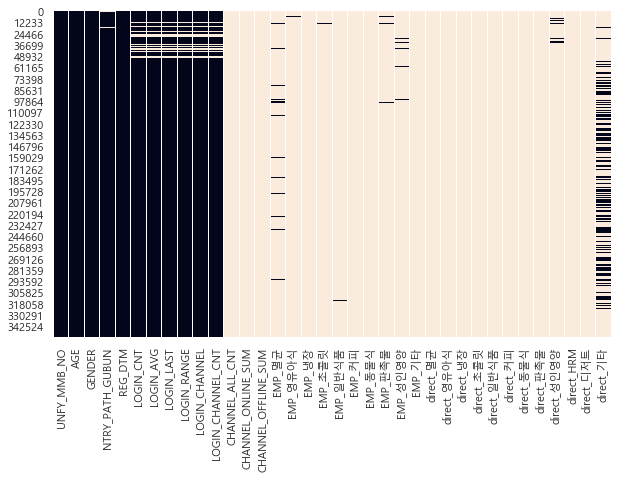

In [13]:
#누락 자료 확인
plt.figure(figsize=(10,6))
sns.heatmap(df_all.isnull(), cbar=False)
plt.show()

In [88]:
df_all.describe()

,UNFY_MMB_NO,AGE,LOGIN_CNT,LOGIN_AVG,LOGIN_LAST,LOGIN_RANGE,LOGIN_CHANNEL_CNT
count,3.545750e+05,354571.000000,341196.000000,341196.000000,341196.000000,341196.000000,341196.000000
mean,5.730713e+06,36.495844,3.509352,8.460876,102.729739,1.025771,3.463209
std,1.857072e+05,9.132813,5.458901,32.811444,54.893765,0.169394,5.334985
min,4.568761e+06,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,5.667420e+06,31.000000,1.000000,0.000000,78.000000,1.000000,1.000000
50%,5.760407e+06,36.000000,2.000000,0.000000,109.000000,1.000000,2.000000
75%,5.852382e+06,41.000000,4.000000,4.300000,112.000000,1.000000,4.000000
max,6.015924e+06,99.000000,696.000000,654.900000,420.000000,4.000000,599.000000


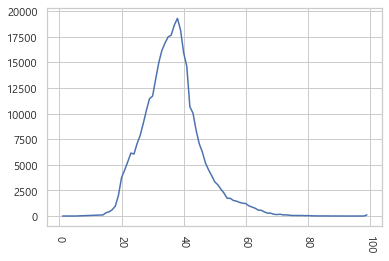

In [89]:
#주요 변수 확인 : 연령대
plt.figure(figsize=(6,4))
plt.plot(df_all.groupby(df_all['AGE'])['AGE'].count())
plt.xticks(rotation=270)
plt.show()

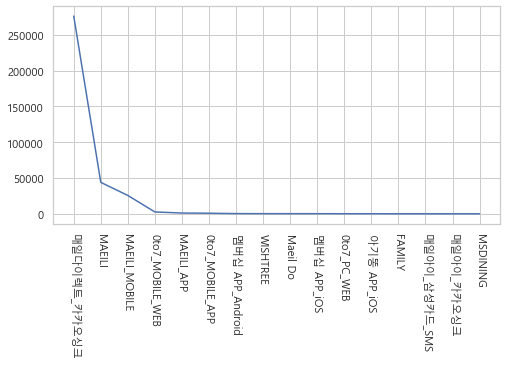

In [90]:
#주요 변수 확인 : 가입경로
plt.figure(figsize=(8,4))
plt.plot(df_all.groupby(df_all['NTRY_PATH_GUBUN'])['NTRY_PATH_GUBUN'].count().sort_values(ascending=False))
plt.xticks(rotation=270)
plt.show()

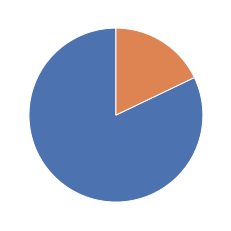

GENDER
F    289768
M     63131
Name: GENDER, dtype: int64

In [16]:
#주요 변수 확인 : 성별

df_all.select_dtypes(include=['object']).columns

plt.pie(df_all.groupby(df_all['GENDER'])['GENDER'].count(), startangle=90)
plt.show()
df_all.groupby(df_all['GENDER'])['GENDER'].count()

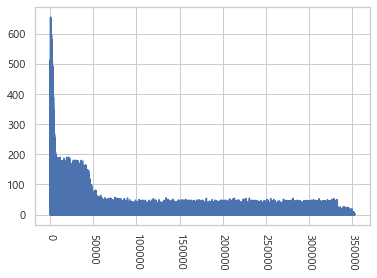

In [20]:
#주요 변수 확인 
plt.figure(figsize=(6,4))
plt.plot(df_all['LOGIN_AVG'])
plt.xticks(rotation=270)
plt.show()

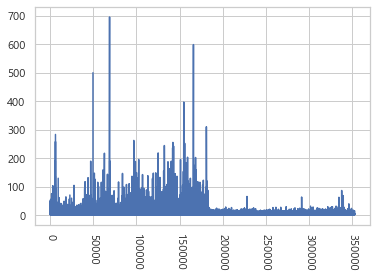

In [22]:
#주요 변수 확인 : 연령대
plt.figure(figsize=(6,4))
plt.plot(df_all['LOGIN_CNT'])
plt.xticks(rotation=270)
plt.show()

In [95]:
print( 'EMP_전체     구매율(%) : {}%'.format(round(df_all.EMP_멸균.count()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( '------------------------------------')
print( 'EMP_멸균     구매율(%) : {}%'.format(round(df_all.EMP_멸균.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_영유아식 구매율(%) : {}%'.format(round(df_all.EMP_영유아식.sum()/df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_냉장     구매율(%) : {}%'.format(round(df_all.EMP_냉장.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_초콜릿   구매율(%) : {}%'.format(round(df_all.EMP_초콜릿.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_커피     구매율(%) : {}%'.format(round(df_all.EMP_커피.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_동물식   구매율(%) : {}%'.format(round(df_all.EMP_동물식.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_판촉물   구매율(%) : {}%'.format(round(df_all.EMP_판촉물.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_성인영양 구매율(%) : {}%'.format(round(df_all.EMP_성인영양.sum()/df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'EMP_기타     구매율(%) : {}%'.format(round(df_all.EMP_기타.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )


EMP_전체     구매율(%) : 12.254%
------------------------------------
EMP_멸균     구매율(%) : 9.148%
EMP_영유아식 구매율(%) : 2.079%
EMP_냉장     구매율(%) : 0.292%
EMP_초콜릿   구매율(%) : 0.446%
EMP_커피     구매율(%) : 0.523%
EMP_동물식   구매율(%) : 0.031%
EMP_판촉물   구매율(%) : 1.362%
EMP_성인영양 구매율(%) : 0.93%
EMP_기타     구매율(%) : 0.002%


In [96]:
print( 'direct_전체     구매율(%) : {}%'.format(round(df_all.direct_디저트.count()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( '------------------------------------')
print( 'direct_멸균     구매율(%) : {}%'.format(round(df_all.direct_멸균.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_영유아식 구매율(%) : {}%'.format(round(df_all.direct_영유아식.sum()/df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_냉장     구매율(%) : {}%'.format(round(df_all.direct_냉장.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_초콜릿   구매율(%) : {}%'.format(round(df_all.direct_초콜릿.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_커피     구매율(%) : {}%'.format(round(df_all.direct_커피.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_동물식   구매율(%) : {}%'.format(round(df_all.direct_동물식.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_판촉물   구매율(%) : {}%'.format(round(df_all.direct_판촉물.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_성인영양 구매율(%) : {}%'.format(round(df_all.direct_성인영양.sum()/df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_HRM      구매율(%) : {}%'.format(round(df_all.direct_HRM.sum()     /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_디저트   구매율(%) : {}%'.format(round(df_all.direct_디저트.sum()  /df_all.UNFY_MMB_NO.count()*100,3) ) )
print( 'direct_기타     구매율(%) : {}%'.format(round(df_all.direct_기타.sum()    /df_all.UNFY_MMB_NO.count()*100,3) ) )


direct_전체     구매율(%) : 38.152%
------------------------------------
direct_멸균     구매율(%) : 0.123%
direct_영유아식 구매율(%) : 0.001%
direct_냉장     구매율(%) : 0.036%
direct_초콜릿   구매율(%) : 0.0%
direct_커피     구매율(%) : 0.0%
direct_동물식   구매율(%) : 0.0%
direct_판촉물   구매율(%) : 0.0%
direct_성인영양 구매율(%) : 5.479%
direct_HRM      구매율(%) : 0.014%
direct_디저트   구매율(%) : 0.0%
direct_기타     구매율(%) : 35.707%


In [16]:
import sweetviz as sv

# feature_config = sv.FeatureConfig(skip="UNFY_MMB_NO")
advert_report = sv.analyze(df_all)

#display the report
advert_report.show_html('./sweetviz_Advertising.html')



                                   |                         | [  0%]   00:00  -> (? left)

Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)

Summarizing dataframe:             |▌                    | [  3%]   00:01  -> (00:44 left)

:UNFY_MMB_NO:                      |▌                    | [  3%]   00:01  -> (00:44 left)

:UNFY_MMB_NO:                      |█▏                   | [  5%]   00:02  -> (00:40 left)

:AGE:                              |█▏                   | [  5%]   00:02  -> (00:40 left)

:AGE:                              |█▋                   | [  8%]   00:03  -> (00:35 left)

:GENDER:                           |█▋                   | [  8%]   00:03  -> (00:35 left)

:GENDER:                           |██▎                  | [ 11%]   00:03  -> (00:27 left)

:NTRY_PATH_GUBUN:                  |██▎                  | [ 11%]   00:03  -> (00:27 left)

:NTRY_PATH_GUBUN:                  |██▊                  | [ 14%]   00:03  -> 

KeyboardInterrupt: 